In [1]:
import csv

In [2]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.stats import expon, kstest

In [3]:
turnovers = []

with open("/workspace/necsim-rust/turnover.csv") as file:
    reader = csv.reader(file)
    
    next(reader)
    
    for row in reader:
        turnovers.append(float(row[0]))

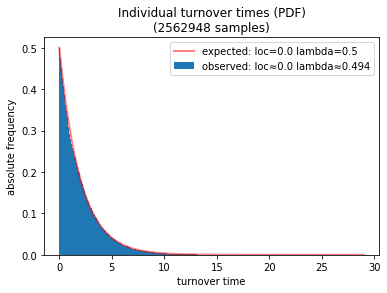

In [4]:
plt.title(f"Individual turnover times (PDF)\n({len(turnovers)} samples)")
plt.xlabel("turnover time")
plt.ylabel("absolute frequency")

xmin = np.min(turnovers)
xmax = np.max(turnovers)

x = np.linspace(xmin, xmax, 1000)
p = expon.pdf(x, 0.0, 2.0)

plt.plot(x, p, color='red', linewidth=2, alpha=0.5, label=f"expected: loc=0.0 lambda=0.5")

loc, scale = expon.fit(turnovers)

plt.hist(turnovers, bins = 1000, density=True, label=f"observed: loc≈{round(loc, 3)} lambda≈{round(1.0/scale, 3)}")

plt.legend()
plt.show()

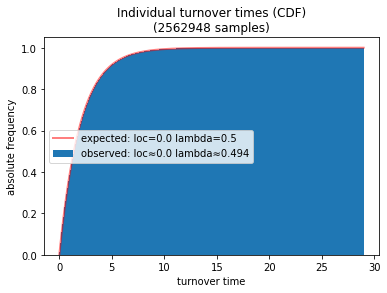

In [5]:
plt.title(f"Individual turnover times (CDF)\n({len(turnovers)} samples)")
plt.xlabel("turnover time")
plt.ylabel("absolute frequency")

xmin = np.min(turnovers)
xmax = np.max(turnovers)

x = np.linspace(xmin, xmax, 1000)
p = expon.cdf(x, 0.0, 2.0)

plt.plot(x, p, color='red', linewidth=2, alpha=0.5, label=f"expected: loc=0.0 lambda=0.5")

loc, scale = expon.fit(turnovers)

plt.hist(turnovers, bins = 1000, density=True, cumulative=True, label=f"observed: loc≈{round(loc, 3)} lambda≈{round(1.0/scale, 3)}")

plt.legend()
plt.show()

In [6]:
kstest(turnovers, expon(loc=0.0, scale=2.0).cdf)

KstestResult(statistic=0.008732735980397144, pvalue=3.395626727724487e-170)